### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Funções de suavização
#from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Dados//AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

Holt também é ideal para dados sem padrões de tendência e de sazonalidade claras

In [3]:
fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False) # smoothing_level=0.8 (alpha), smoothing_slope=0.2 é a inclinação(beta)
fcast1 = fit1.forecast(12).rename("Holt´s linear trend")

C:\Users\danilo portela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Plotando o modelo e a previsão

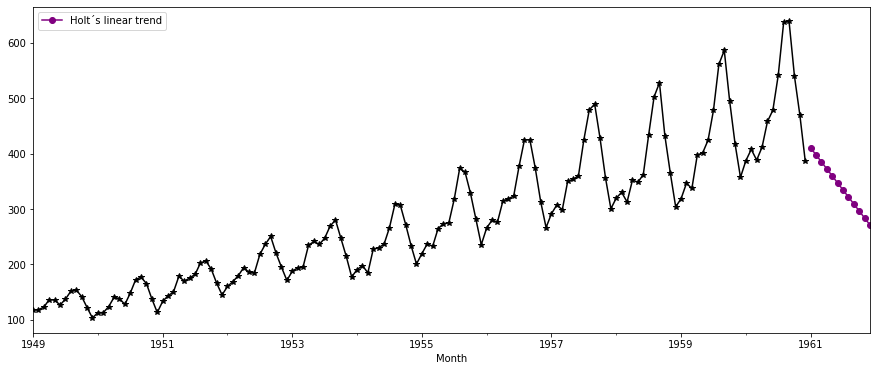

In [5]:
fcast1.plot(marker='o', color='purple', legend=True) # previsão
fit1.fittedvalues.plot(marker='*', color='black') # Modelo

### Otimizando

In [11]:
fit2 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2) 
fcast2 = fit2.forecast(12).rename("Aditivo Amortecido")

C:\Users\danilo portela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


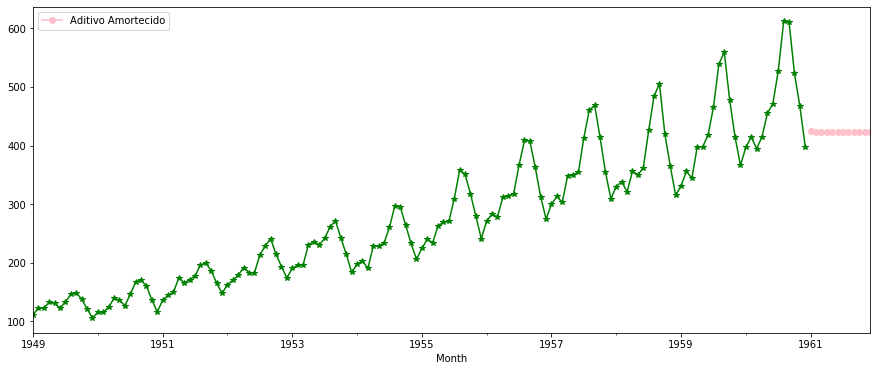

In [12]:
fcast2.plot(marker='o', color='pink', legend=True) # previsão
fit2.fittedvalues.plot(marker='*', color='green') # Modelo